<a href="https://colab.research.google.com/github/tephlonee/housing_prediction/blob/main/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
mnist['DESCR']

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [ ]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [ ]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

Saving figure some_digit_plot


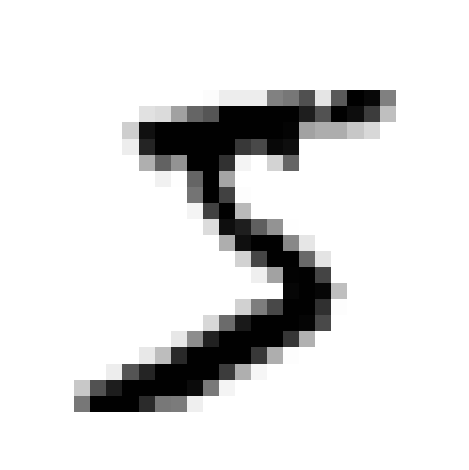

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")

In [6]:
y = y.astype(np.uint8)

In [5]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


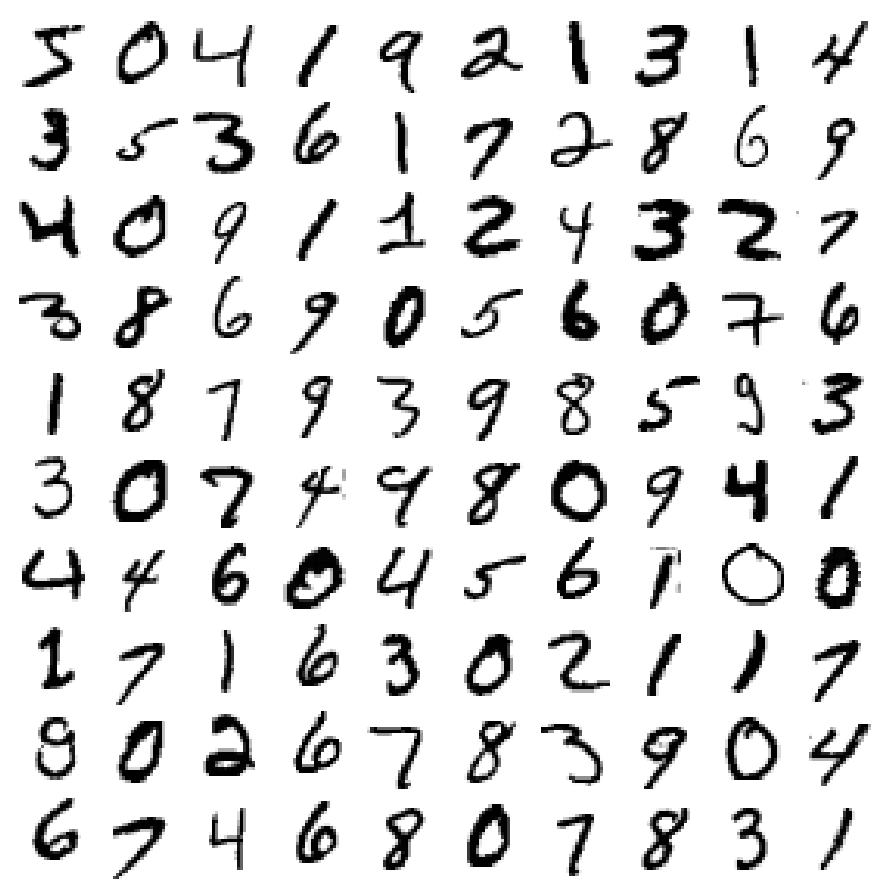

In [ ]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [ ]:
np.unique(y_train_5)

array([False,  True])

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [11]:
y_train_pred = sgd_clf.predict(X_train)

In [ ]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [ ]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [13]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
y_train_pred.shape

(60000,)

In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [15]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [ ]:
recall_score(y_train_5 , y_train_pred)

0.6511713705958311

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [ ]:
y_scores = sgd_clf.decision_function(X_train)
y_scores

array([  2164.22030239,  -5897.37359354, -13489.14805779, ...,
         6007.43513003,   -695.89564908,  -3991.49590678])

In [ ]:
from sklearn.metrics import roc_auc_score , roc_curve

roc_auc_score(y_train_5, y_scores)

np.float64(0.9709618248430906)

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

Saving figure precision_recall_vs_threshold_plot


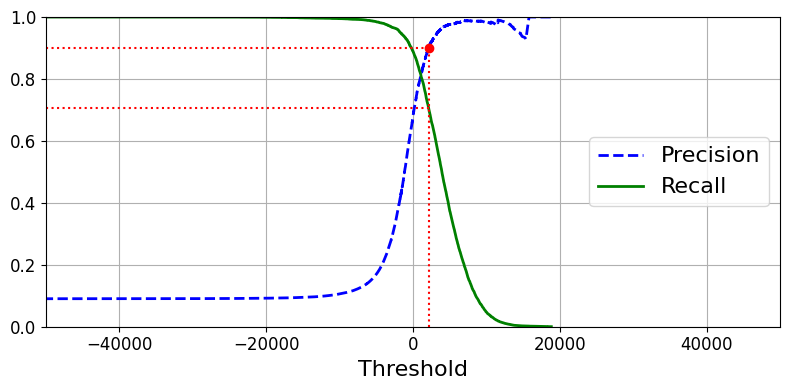

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
#plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

Saving figure roc_curve_plot


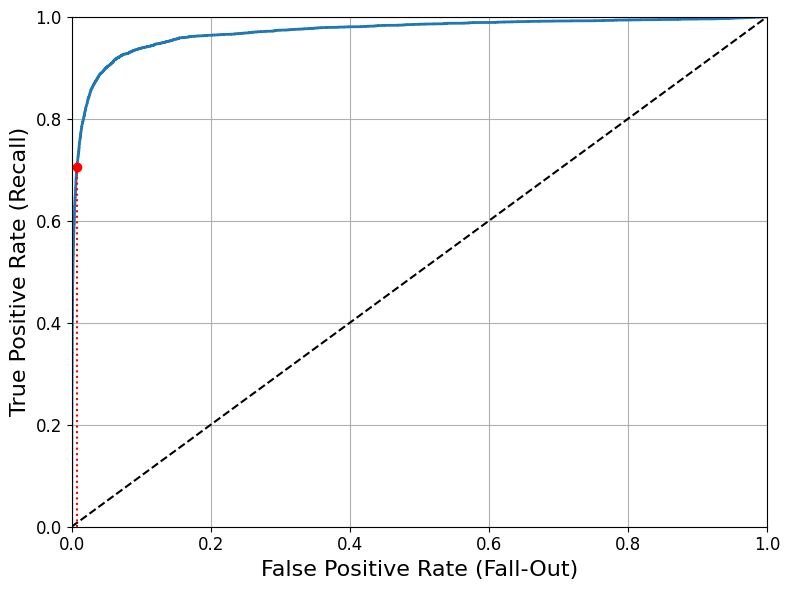

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
save_fig("roc_curve_plot")                                    # Not shown
plt.show()

In [43]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [16]:
from sklearn.model_selection import learning_curve

def plot_learning_curves(estimator , X_data, y_data):
    train_sizes, train_scores, valid_scores = learning_curve(
    estimator, X_data, y_data, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5)
    )

    train_mean = np.mean(train_scores, axis=1)
    valid_mean = np.mean(valid_scores, axis=1)

    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, valid_mean, label='Validation score')
    plt.xlabel('Training set size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

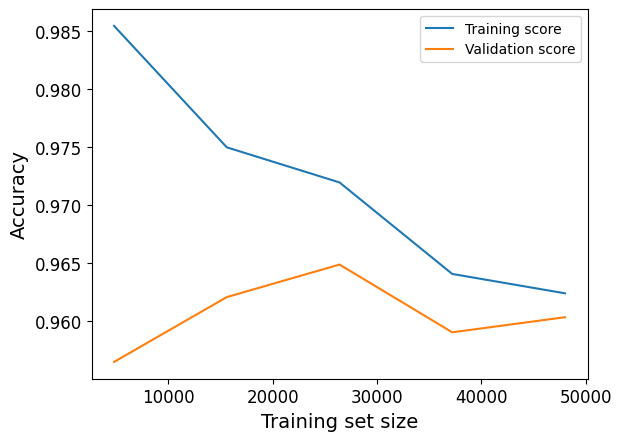

In [17]:
plot_learning_curves(sgd_clf , X_train , y_train_5)

In [ ]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

Saving figure roc_curve_comparison_plot


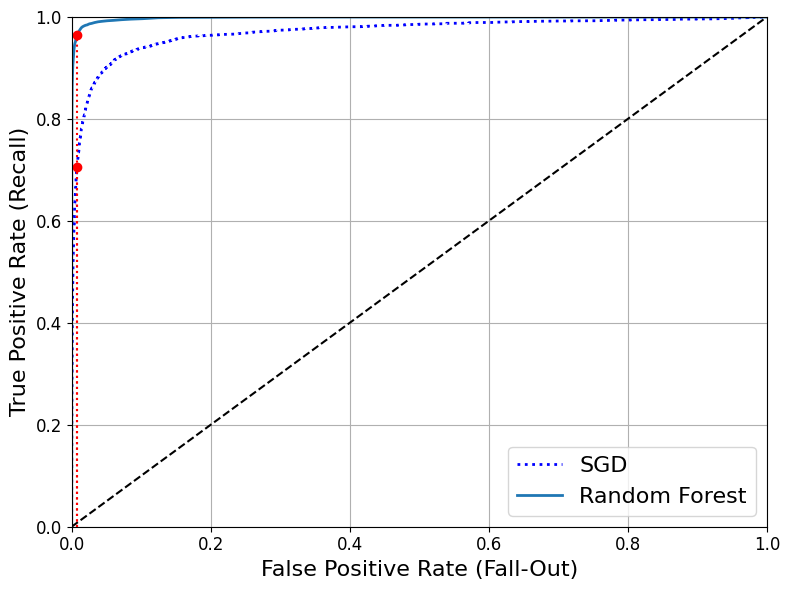

In [ ]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

## Comparative Analysis of KNN, SGD, RandomForest

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

class ModelComparator:

    def __init__(self , X_train , y_train , cv_fold = 5):
        self.X_train = X_train
        self.y_train = y_train
        self.cv_fold = cv_fold


        self.models = {
            'forest' : {
                'model' : RandomForestClassifier(n_estimators=100, random_state=42),
                'params' : {
                    'n_estimators': [10, 50, 100],
                    'max_depth': [None, 15 , 30],
                }

            }
        }

    def run_comparision(self):
        results = []
        for model_name , model in self.models.items():

            print(' '* 5 + '='*10  + " "*5)
            grid_search = GridSearchCV(model['model'] , model['params'] , cv=self.cv_fold , verbose = 3)
            print('Training')
            grid_search.fit(self.X_train , self.y_train)

            model_results = {
                'estimator' :grid_search.best_estimator_,
                'best_params' : grid_search.best_params_,
                'best_score' : grid_search.best_score_
            }
            results.append(model_results)

            print()
            print('Best Estimator' , model_results['estimator'])
            print('Best Score' ,model_results['best_score'])
            print()

        return results




hyp = ModelComparator(X_train , y_train)
results = hyp.run_comparision()



Training
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ...max_depth=None, n_estimators=10;, score=0.947 total time=   4.1s
[CV 2/5] END ...max_depth=None, n_estimators=10;, score=0.943 total time=   3.7s
[CV 3/5] END ...max_depth=None, n_estimators=10;, score=0.941 total time=   3.8s
[CV 4/5] END ...max_depth=None, n_estimators=10;, score=0.939 total time=   3.9s
[CV 5/5] END ...max_depth=None, n_estimators=10;, score=0.948 total time=   3.9s
[CV 1/5] END ...max_depth=None, n_estimators=50;, score=0.965 total time=  17.3s
[CV 2/5] END ...max_depth=None, n_estimators=50;, score=0.963 total time=  17.7s
[CV 3/5] END ...max_depth=None, n_estimators=50;, score=0.963 total time=  17.9s
[CV 4/5] END ...max_depth=None, n_estimators=50;, score=0.961 total time=  18.3s
[CV 5/5] END ...max_depth=None, n_estimators=50;, score=0.968 total time=  17.8s
[CV 1/5] END ..max_depth=None, n_estimators=100;, score=0.968 total time=  34.8s
[CV 2/5] END ..max_depth=None, n_estimat

In [52]:
best_rgd_estimator = RandomForestClassifier(max_depth=30 , random_state = 42)
best_rgd_estimator.fit(X_train , y_train)

RandomForestClassifier(max_depth=30, random_state=42)

In [53]:
rfr_y_red = best_rgd_estimator.predict(X_test)
rfr_confusion_matrix = confusion_matrix(y_test , rfr_y_red)
rfr_confusion_matrix

array([[ 969,    0,    0,    0,    0,    3,    4,    1,    3,    0],
       [   0, 1124,    2,    3,    0,    1,    3,    0,    1,    1],
       [   6,    0,  996,    7,    3,    0,    4,   10,    6,    0],
       [   1,    0,    9,  972,    0,    7,    0,    9,    9,    3],
       [   1,    0,    1,    0,  961,    0,    5,    0,    3,   11],
       [   3,    0,    0,   13,    3,  856,    6,    2,    7,    2],
       [   6,    3,    1,    1,    5,    3,  936,    0,    3,    0],
       [   1,    3,   18,    1,    1,    0,    0,  990,    2,   12],
       [   5,    0,    5,   10,    3,    5,    2,    3,  930,   11],
       [   6,    5,    3,    9,   14,    2,    1,    5,    3,  961]])

In [54]:
accuracy_score(y_test , rfr_y_red)

0.9695

In [81]:
print('Precision Score: ', precision_score(y_test, rfr_y_red, average='macro'))
print('Recall Score: ', recall_score(y_test, rfr_y_red, average='macro'))
print('F1 Score: ', f1_score(y_test, rfr_y_red, average='macro'))

Precision Score:  0.9693374769655654
Recall Score:  0.9692156842583023
F1 Score:  0.9692543840242811


In [ ]:
plot_learning_curves(best_rgd_estimator , X_train ,y_train)

In [ ]:
sgd_clf_multi_class = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf_multi_class.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

grid_search = GridSearchCV(sgd_clf ,
              {'max_iter' : [1000, 1500] ,
               'tol' : [1e-3 , 1e-4] ,
               'eta0' : [0.001 , 0.01]
              }, cv=5 , verbose = 3)
grid_search.fit(X_train , y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END eta0=0.001, max_iter=1000, tol=0.001;, score=0.881 total time= 2.5min
[CV 2/5] END eta0=0.001, max_iter=1000, tol=0.001;, score=0.883 total time= 2.5min
[CV 3/5] END eta0=0.001, max_iter=1000, tol=0.001;, score=0.881 total time= 2.5min
[CV 4/5] END eta0=0.001, max_iter=1000, tol=0.001;, score=0.866 total time= 2.4min
[CV 5/5] END eta0=0.001, max_iter=1000, tol=0.001;, score=0.887 total time= 2.5min
[CV 1/5] END eta0=0.001, max_iter=1000, tol=0.0001;, score=0.881 total time= 2.5min
[CV 2/5] END eta0=0.001, max_iter=1000, tol=0.0001;, score=0.883 total time= 2.6min
[CV 3/5] END eta0=0.001, max_iter=1000, tol=0.0001;, score=0.881 total time= 2.5min
[CV 4/5] END eta0=0.001, max_iter=1000, tol=0.0001;, score=0.866 total time= 2.4min
[CV 5/5] END eta0=0.001, max_iter=1000, tol=0.0001;, score=0.887 total time= 2.5min
[CV 1/5] END eta0=0.001, max_iter=1500, tol=0.001;, score=0.881 total time= 2.5min
[CV 2/5] END eta0=0.00

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=42),
             param_grid={'eta0': [0.001, 0.01], 'max_iter': [1000, 1500],
                         'tol': [0.001, 0.0001]},
             verbose=3)

## Hyperparmeter tuned SGD CLASSI

In [ ]:
grid_search.best_params_

{'eta0': 0.001, 'max_iter': 1000, 'tol': 0.001}

In [ ]:
best_sgd_estimator = grid_search.best_estimator_
best_sgd_estimator.fit(X_train , y_train)

SGDClassifier(eta0=0.001, random_state=42)

In [ ]:
grid_search.best_score_

np.float64(0.8798)

In [ ]:
from collections import Counter
Counter(sgd)

Counter({np.uint8(5): 5421,
         np.uint8(0): 5923,
         np.uint8(4): 5842,
         np.uint8(1): 6742,
         np.uint8(9): 5949,
         np.uint8(2): 5958,
         np.uint8(3): 6131,
         np.uint8(6): 5918,
         np.uint8(7): 6265,
         np.uint8(8): 5851})

In [ ]:
best_sgd_estimator = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42 , eta0=0.001)
best_sgd_estimator.fit(X_train , y_train)

In [57]:

sgd_y_pred = best_sgd_estimator.predict(X_test)
sgd_confusion_matrix = confusion_matrix(y_test , sgd_y_pred)
sgd_confusion_matrix

array([[ 902,    0,    8,   11,    1,   13,    2,    4,   39,    0],
       [   0, 1095,    2,    3,    0,    2,    4,    1,   28,    0],
       [   1,   10,  803,   69,    6,    4,    4,   10,  122,    3],
       [   0,    1,    6,  931,    1,   21,    3,    7,   35,    5],
       [   2,    2,    9,   15,  778,    4,    2,    9,   62,   99],
       [   6,    2,    1,   71,    3,  709,   12,   12,   67,    9],
       [   5,    3,   12,   13,    5,   21,  854,    0,   45,    0],
       [   0,    3,   18,   20,    3,    4,    1,  919,   18,   42],
       [   3,    5,    2,   30,    4,   43,    5,    5,  872,    5],
       [   3,    5,    2,   33,    7,    5,    0,   20,   57,  877]])

Saving figure sgd_best_estimator_confusion_matrix


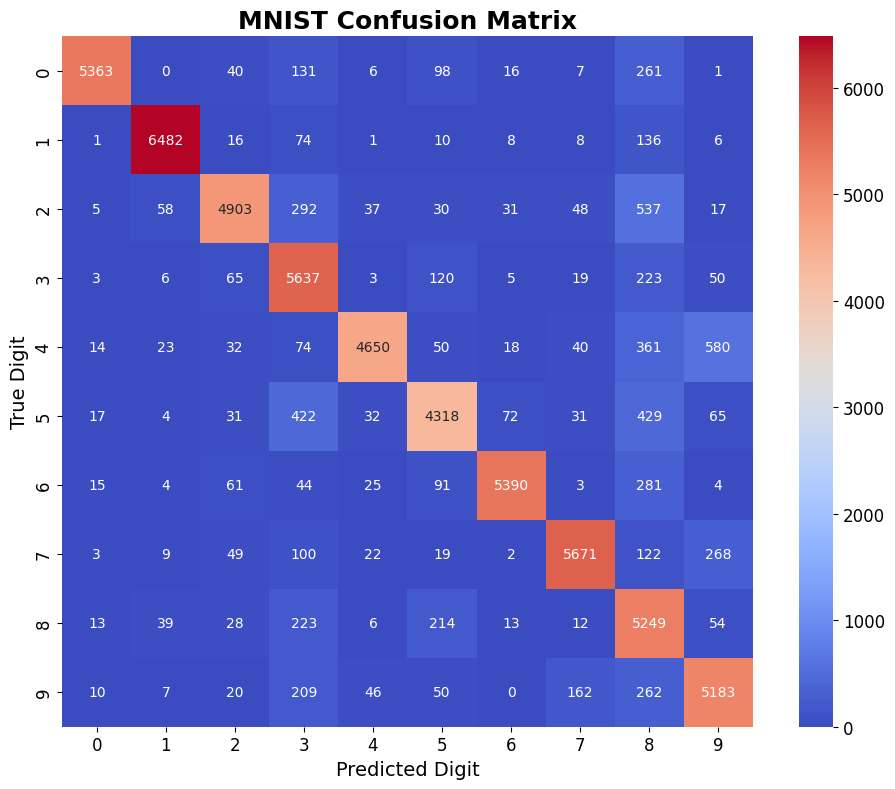

In [33]:
import seaborn as sns

def plot_confusion_matrix(matrix , name_of_figure):
    """If you prefer color and a colorbar"""
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='coolwarm', square=True)
    plt.title('MNIST Confusion Matrix', fontsize=18, weight='bold')
    plt.xlabel('Predicted Digit')
    plt.ylabel('True Digit')
    save_fig(name_of_figure , fig_extension='eps')
    plt.show()

plot_confusion_matrix(sgd_confusion_matrix , name_of_figure="sgd_best_estimator_confusion_matrix")

In [80]:
print('Precision Score: ', precision_score(y_test, sgd_y_pred, average='macro'))
print('Recall Score: ', recall_score(y_test, sgd_y_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, sgd_y_pred, average='macro'))

Precision Score:  0.8866401587452636
Recall Score:  0.8722016551120783
F1 Score:  0.8749260091812581


In [37]:

from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [38]:
base_knn_y_pred = knn_clf.predict(X_train)
accuracy_score(y_train , base_knn_y_pred)

1.0

In [25]:
y_knn_pred = knn_clf.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.9714

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_neighbors': [3, 4, 5] , 'weights' : ['uniform' , 'distance']}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  36.6s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  36.0s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  34.0s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  35.1s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  34.7s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  34.8s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  35.0s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  34.0s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  35.5s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  36.1s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=  35.3s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [28]:
knn_best_estimator = grid_search.best_estimator_
knn_best_estimator.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [31]:
best_kr.best_params_

AttributeError: 'SGDClassifier' object has no attribute 'best_params_'

In [32]:
knn_y_pred = knn_best_estimator.predict(X_test)
knn_confusion_matrix = confusion_matrix(y_test , knn_y_pred)
knn_confusion_matrix

array([[ 973,    1,    1,    0,    0,    1,    3,    1,    0,    0],
       [   0, 1132,    2,    0,    0,    0,    1,    0,    0,    0],
       [  10,    5,  995,    2,    1,    0,    0,   16,    3,    0],
       [   0,    1,    3,  974,    1,   14,    1,    7,    4,    5],
       [   1,    5,    0,    0,  950,    0,    4,    3,    0,   19],
       [   4,    0,    0,    9,    2,  862,    7,    1,    3,    4],
       [   4,    2,    0,    0,    3,    3,  946,    0,    0,    0],
       [   0,   17,    4,    0,    3,    0,    0,  994,    0,   10],
       [   5,    2,    4,   14,    5,   11,    4,    4,  920,    5],
       [   3,    4,    2,    7,    9,    4,    1,   10,    1,  968]])

Saving figure knn_best_estimator_confusion_matrix


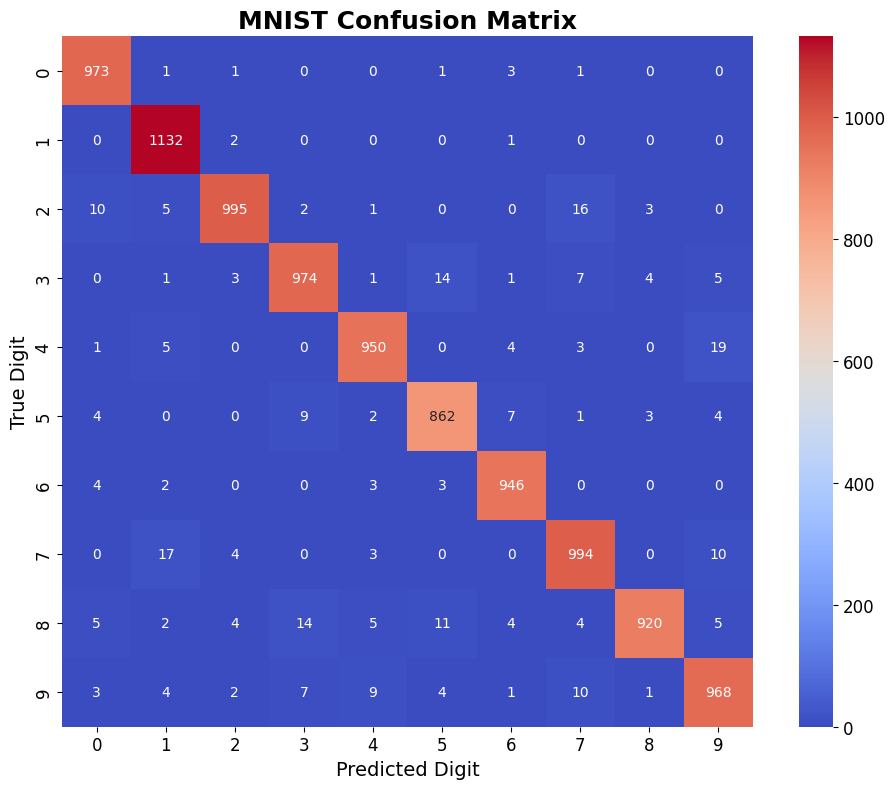

In [34]:
plot_confusion_matrix(knn_confusion_matrix , name_of_figure="knn_best_estimator_confusion_matrix")

In [77]:
from sklearn.metrics import f1_score

In [78]:
print('Precision Score: ', precision_score(y_test, knn_y_pred, average='macro'))
print('Recall Score: ', recall_score(y_test, knn_y_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, knn_y_pred, average='macro'))

Precision Score:  0.9715597201945959
Recall Score:  0.9710823052664403
F1 Score:  0.971224084176584


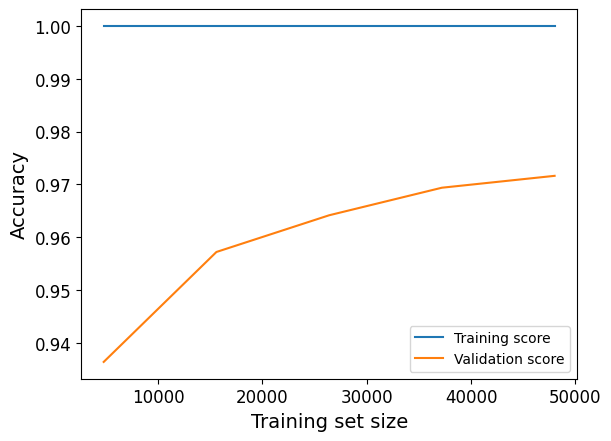

In [35]:
plot_learning_curves(knn_best_estimator , X_train , y_train)

In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_reg.fit(X_train, y_train)

In [45]:
def plot_learning_curves_multi(models, X_data, y_data, cv=3):
    """
    Plot learning curves for multiple estimators on the same figure.

    Parameters:
    -----------
    models : dict
        Dictionary of model name → estimator, e.g.
        {'Random Forest': rf, 'KNN': knn, 'SVM': svm}
    X_data, y_data : array-like
        Training data and labels.
    cv : int
        Number of cross-validation folds.
    """
    plt.figure(figsize=(10, 6))

    for name, estimator in models.items():
        train_sizes, train_scores, valid_scores = learning_curve(
            estimator, X_data, y_data, cv=cv, scoring='accuracy',
            train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
        )

        train_mean = np.mean(train_scores, axis=1)
        valid_mean = np.mean(valid_scores, axis=1)

        plt.plot(train_sizes, train_mean, '--', label=f'{name} - Training')
        plt.plot(train_sizes, valid_mean, '-', label=f'{name} - Validation')

    plt.title('Learning Curves for Multiple Models')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

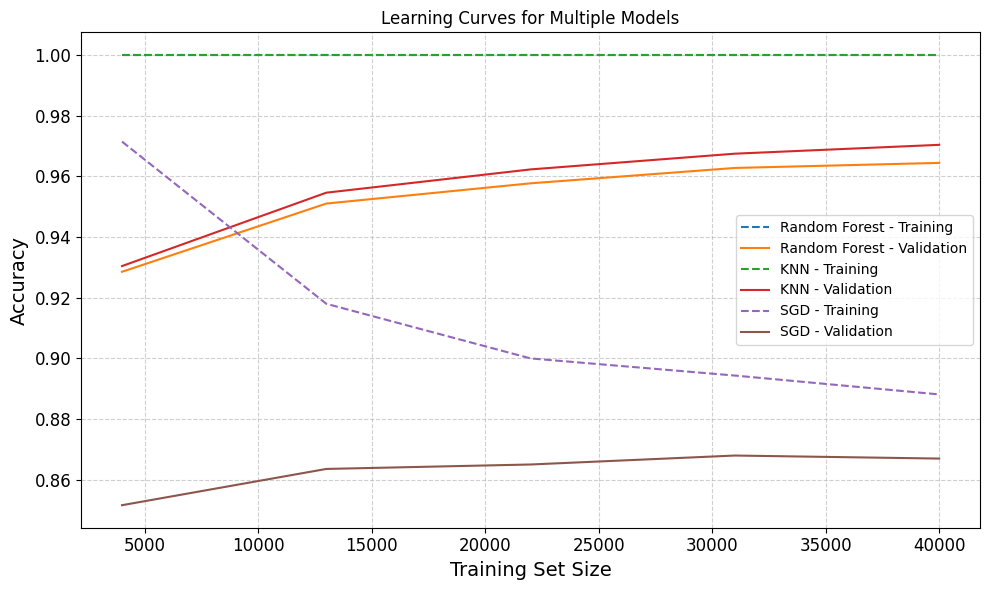

In [46]:
plot_learning_curves_multi(
    {'Random Forest': RandomForestClassifier(max_depth=30, random_state=42), 'KNN': knn_best_estimator, 'SGD' : SGDClassifier(eta0=0.001, random_state=42)},
    X_train, y_train
)

Saving figure sgd_knn_rdf_confusion_matrices_v2


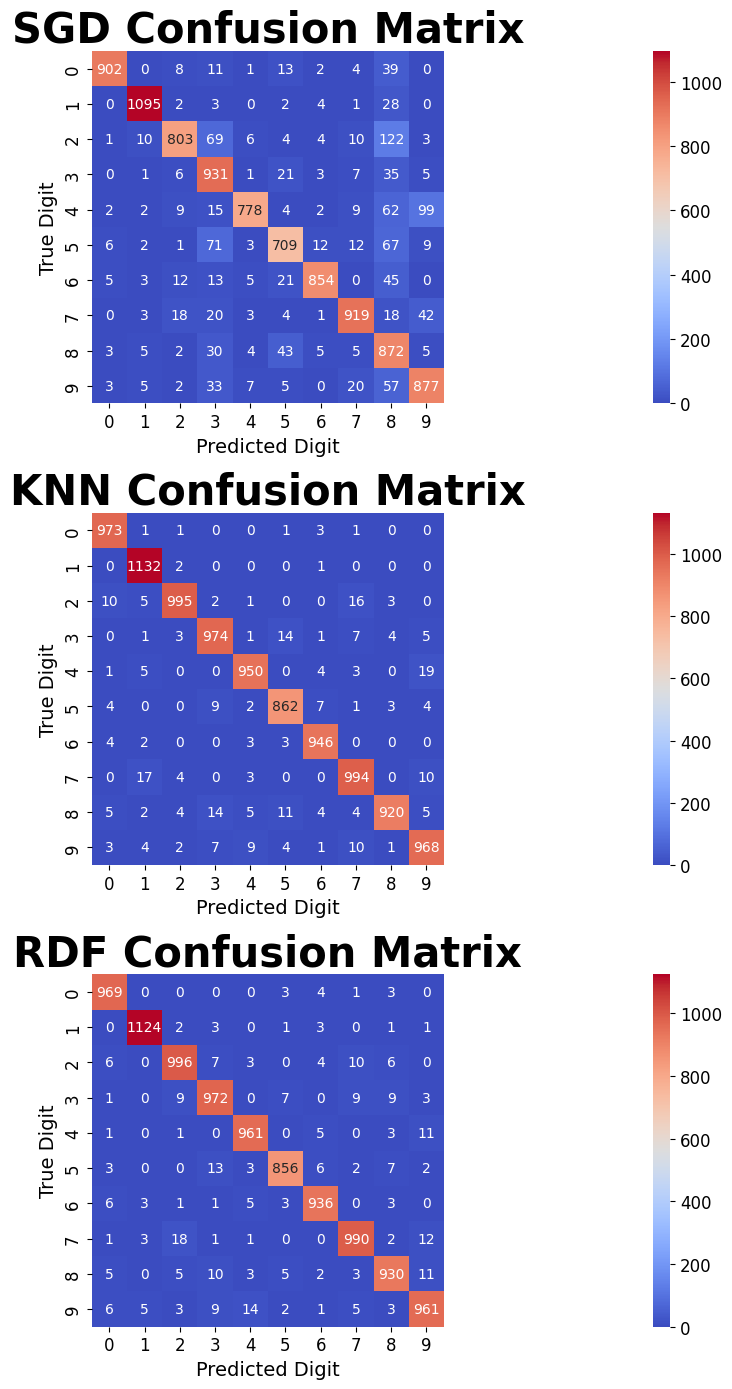

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrices(matrices, model_names, figure_name):
    """
    Plot multiple confusion matrices side by side using subplots.

    Parameters:
    -----------
    matrices : list of 2D arrays
        Confusion matrices for each model.
    model_names : list of str
        Names of the models corresponding to the matrices.
    figure_name : str
        Name to save the figure (EPS format supported).
    """
    n_models = len(matrices)
    fig, axes = plt.subplots(n_models , 1 ,figsize=(14 * n_models, 14))

    if n_models == 1:
        axes = [axes]  # ensure axes is iterable

    for ax, matrix, name in zip(axes, matrices, model_names):
        sns.heatmap(matrix, annot=True, fmt='d', cmap='coolwarm', square=True, ax=ax)
        ax.set_title(f'{name} Confusion Matrix', fontsize=30, weight='bold')
        ax.set_xlabel('Predicted Digit')
        ax.set_ylabel('True Digit')

    plt.tight_layout()
    save_fig(figure_name, fig_extension='eps' , resolution=300)
    plt.show()


plot_confusion_matrices(
    [sgd_confusion_matrix, knn_confusion_matrix , rfr_confusion_matrix],
    ['SGD', 'KNN' , 'RDF'],
    'sgd_knn_rdf_confusion_matrices_v2'
)